In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)
# Notice that the labels or y data is not standardized.

Use `least_squares` to compute w, and visualize the results.

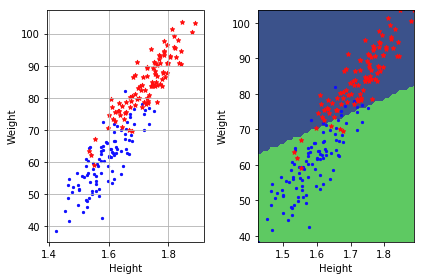

In [3]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # classify the data by linear regression: TODO    
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    y = y.reshape(len(y)) # Weird things happen with (N,1) dim arrays.
    w, loss = least_squares(y, tx)
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [4]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return np.exp(t)/(1 + np.exp(t))

In [5]:
def compute_loss(y, tx, w):
    loss = sum(np.log(1 + np.exp(tx.dot(w)))) - y.T.dot(tx.dot(w))
    return loss

In [6]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    return tx.T.dot(sigmoid(tx.dot(w))) - tx.T.dot(y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [7]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # compute the cost
    loss = compute_loss(y, tx, w)
    # compute the gradient
    gradient = compute_gradient(y, tx, w)
    # update w
    w = w - gamma * gradient
    return loss, w

Demo!

Current iteration=0, loss=[[138.62943611]]
Current iteration=100, loss=[[43.46403231]]
Current iteration=200, loss=[[41.54589281]]
Current iteration=300, loss=[[41.09863897]]
Current iteration=400, loss=[[40.96487064]]
Current iteration=500, loss=[[40.92008946]]
Current iteration=600, loss=[[40.90418744]]
Current iteration=700, loss=[[40.89834995]]
Current iteration=800, loss=[[40.89616497]]
Current iteration=900, loss=[[40.89533753]]
Current iteration=1000, loss=[[40.89502196]]
Current iteration=1100, loss=[[40.89490109]]
Current iteration=1200, loss=[[40.89485466]]
Current iteration=1300, loss=[[40.8948368]]
Current iteration=1400, loss=[[40.89482992]]
Current iteration=1500, loss=[[40.89482727]]
loss=[[40.89482664]]


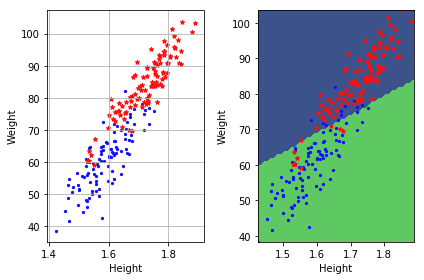

In [8]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=compute_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [9]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # calculate hessian
    Xw = tx.dot(w)
    sigma_Xw = sigmoid(Xw).reshape(-1)
    S = np.diag(sigma_Xw*(1 - sigma_Xw))
    return tx.T.dot(S).dot(tx)

Write a function below to return loss, gradient, and hessian.

In [10]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # return loss, gradient, and hessian
    loss = compute_loss(y, tx, w)
    gradient = compute_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    return loss, gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [11]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # return loss, gradient and hessian
    loss, gradient, hessian = logistic_regression(y, tx, w)
    # update w
    inv_hessian = np.linalg.inv(hessian)
    w = w - inv_hessian.dot(gradient)
    return loss, w

demo

Current iteration=0, the loss=[[138.62943611]]
Current iteration=1, the loss=[[63.41155374]]
Current iteration=2, the loss=[[47.3045862]]
Current iteration=3, the loss=[[41.99746742]]
Current iteration=4, the loss=[[40.95639864]]
Current iteration=5, the loss=[[40.89511994]]
Current iteration=6, the loss=[[40.89482562]]
Current iteration=7, the loss=[[40.89482561]]
loss=[[40.89482561]]


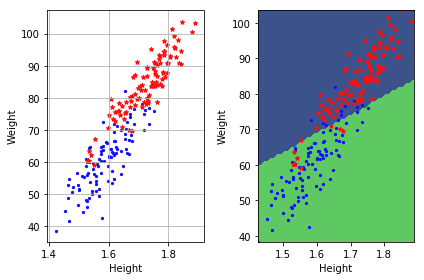

In [12]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=compute_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [13]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # return loss, gradient, and hessian
    loss = compute_loss(y, tx, w) + lambda_ * sum(w*w)/2
    gradient = compute_gradient(y, tx, w) + lambda_ * w
    old_hessian = calculate_hessian(y, tx, w) 
    hessian = old_hessian + lambda_ * np.identity(old_hessian.shape[0])
    return loss, gradient, hessian

In [16]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # return loss, gradient and hessian
    loss, gradient, hessian = penalized_logistic_regression(y, tx, w, lambda_)
    # update w
    inv_hessian = np.linalg.inv(hessian)
    w = w - gamma * np.linalg.solve(hessian,gradient)
    return loss, w

Current iteration=0, loss=[[138.62943611]]
Current iteration=100, loss=[[72.38783148]]
Current iteration=200, loss=[[51.6413819]]
Current iteration=300, loss=[[45.11508517]]
Current iteration=400, loss=[[43.55739572]]
Current iteration=500, loss=[[43.2750659]]
Current iteration=600, loss=[[43.23191914]]
Current iteration=700, loss=[[43.22583096]]
Current iteration=800, loss=[[43.2249992]]
Current iteration=900, loss=[[43.22488695]]
Current iteration=1000, loss=[[43.22487188]]
loss=[[41.22300814]]


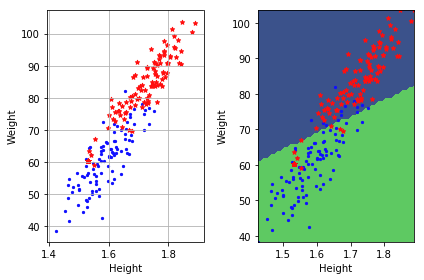

In [17]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=compute_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)